#### 위상 정렬(topology sort)
- 사이클이 없는 방향 그래프에서 노드 순서를 찾는 알고리즘
- 사이클이 없는 방향 그래프의 모든 노드를 방향성에 거스르지 않도록 순서대로 나열하는 것을 의미

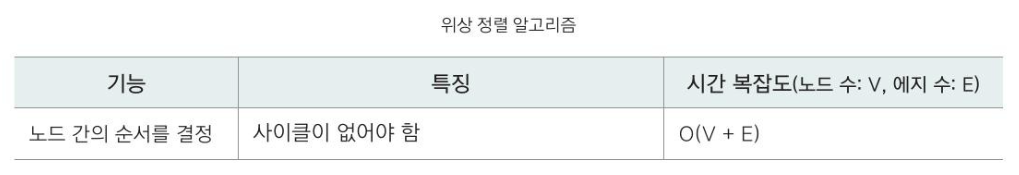

- 진입차수와 진출차수
    - 진입차수(Indegree): 특정한 노드로 들어오는 간선(엣지)의 개수
    - 진출차수(Outdegree): 특정한 노드에서 나가는 간선(엣지)의 개수

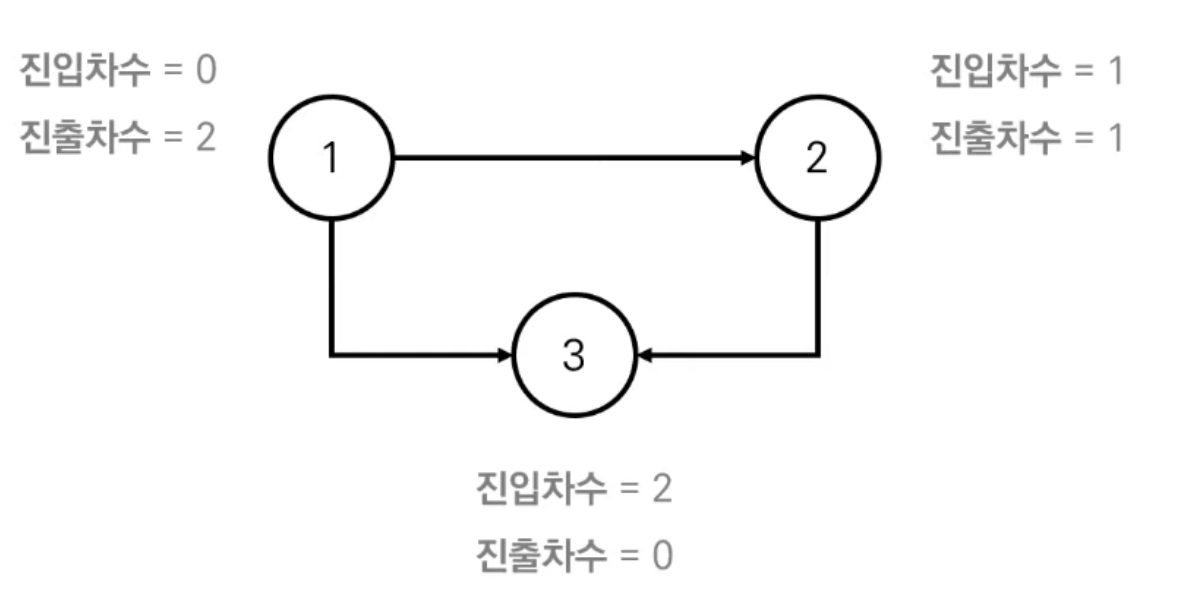

##### 위상 정렬 알고리즘
- 큐를 이용하는 위상 정렬 알고리즘의 동작 과정은 다음과 같다
    1. 진입차수가 0인 모든 노드를 큐에 넣는다
    2. 큐가 빌 때까지 다음의 과정을 반복한다
        - 큐에서 원소를 꺼내 해당 노드에서 나가는 간선을 그래프에서 제거한다
        - 새롭게 진입차수가 0이 된 노드를 큐에 넣는다
- => 결과 적으로 각 노드가 큐에 들어온 순서가 위상 정렬을 수행한 결과와 같다

##### 동작 예시
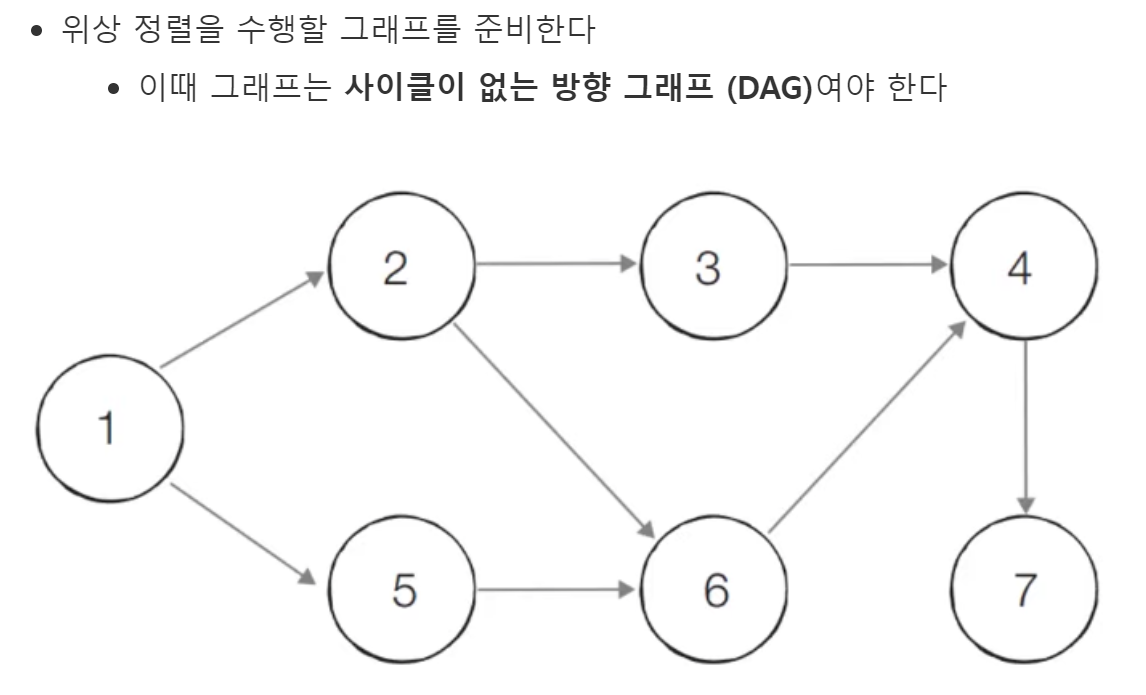

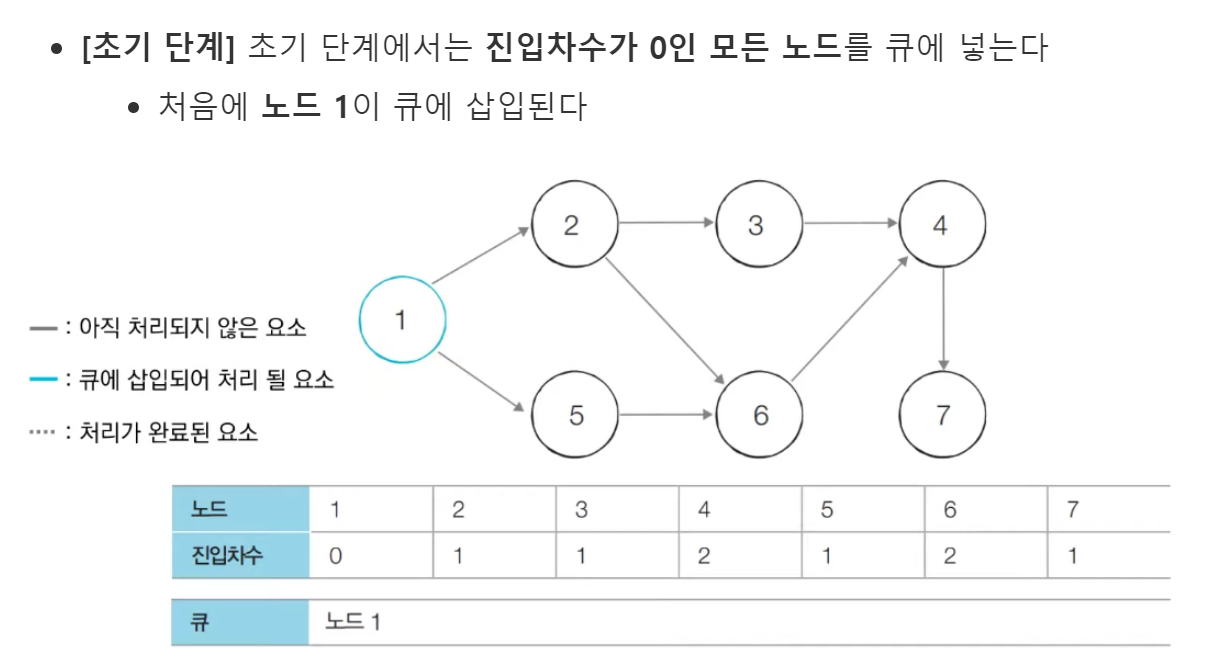

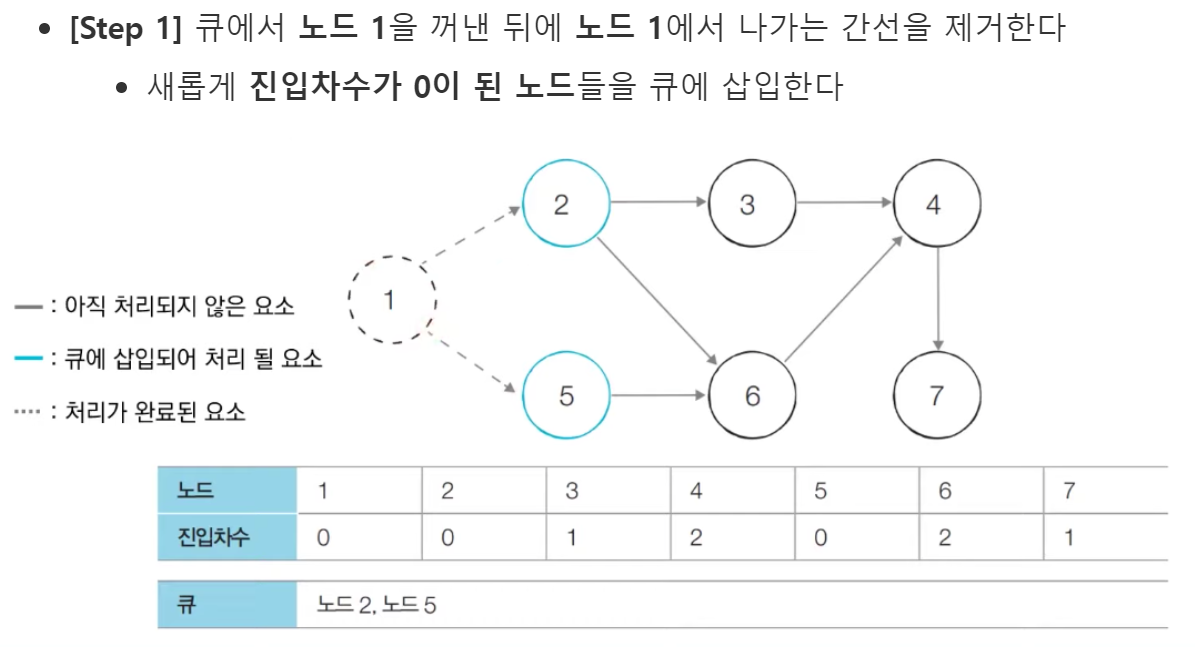

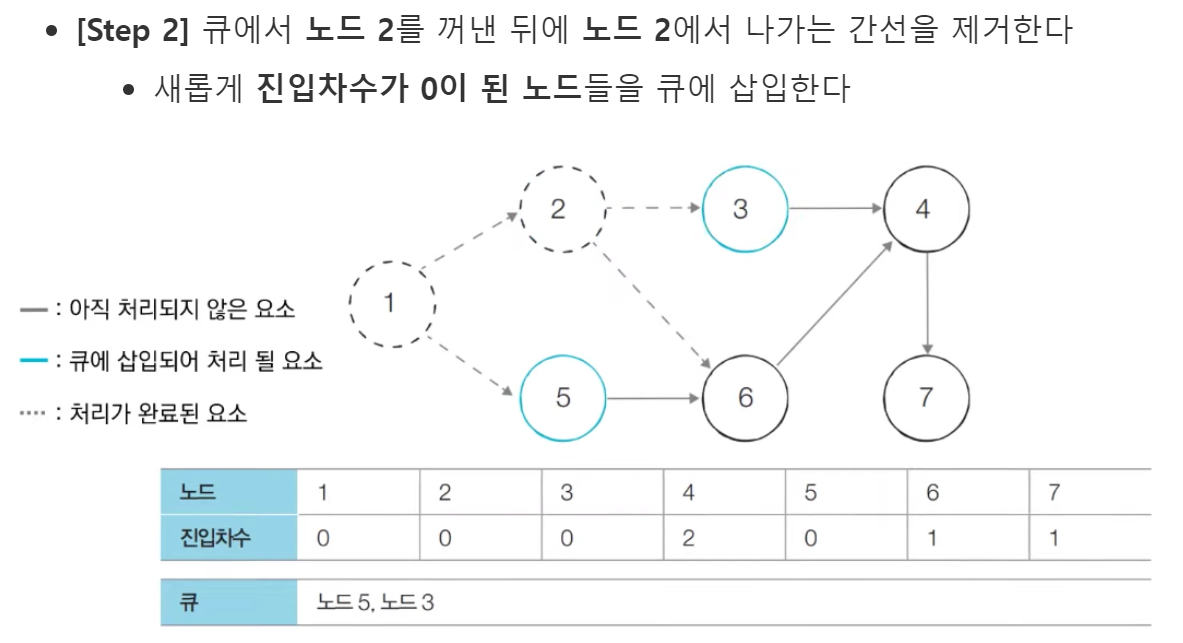

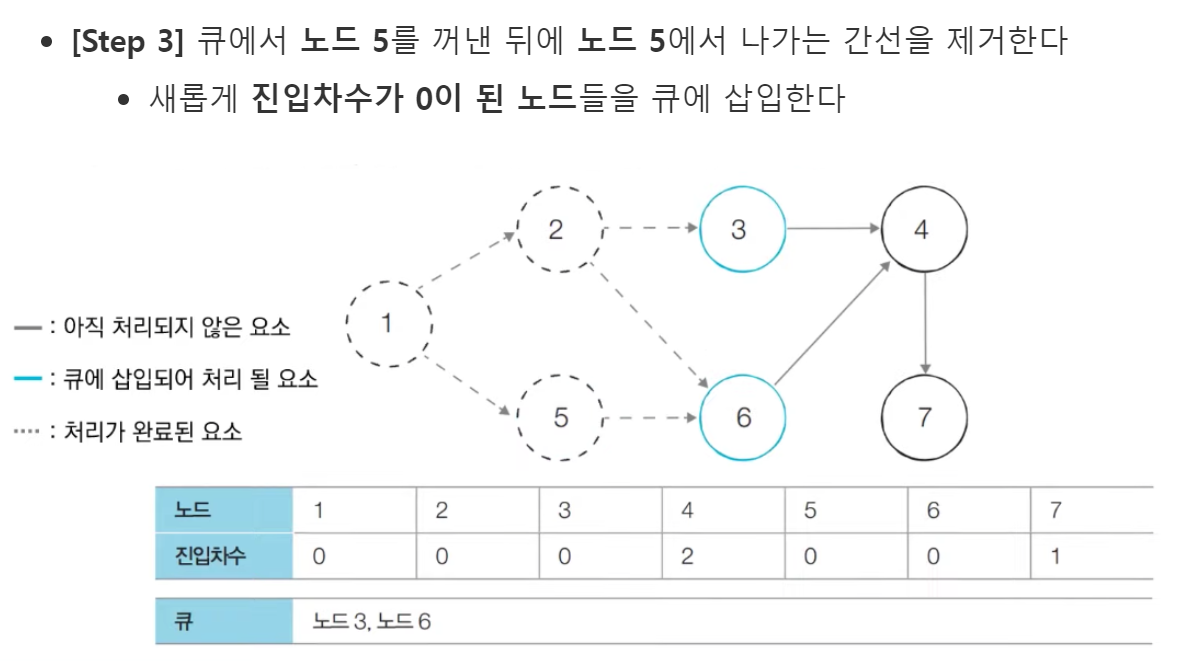

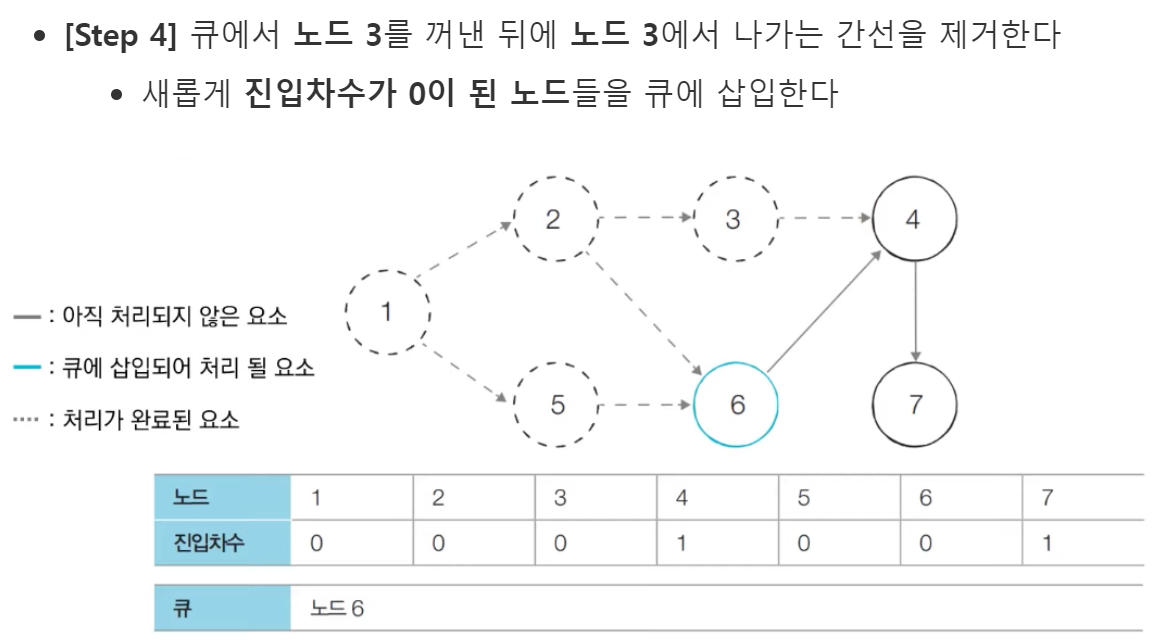

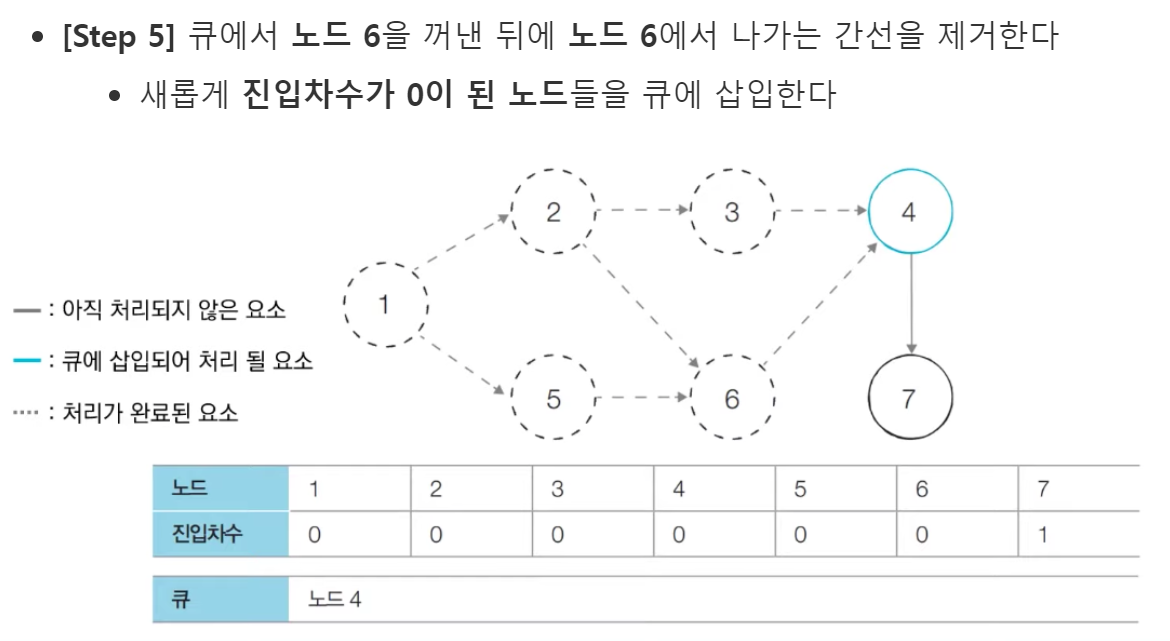

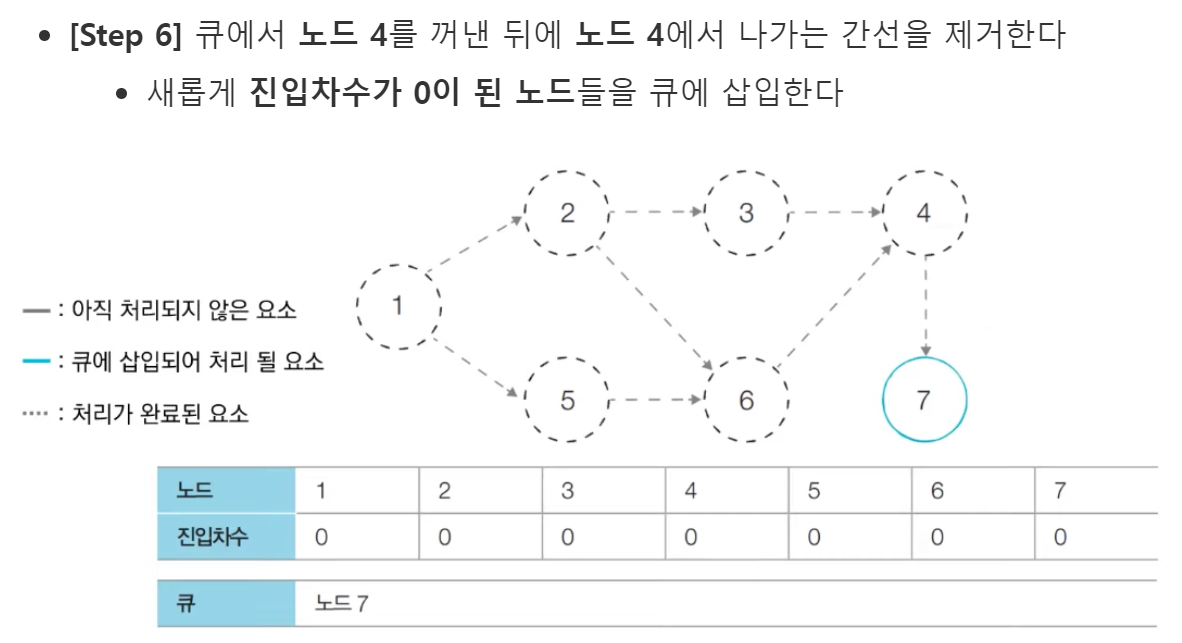

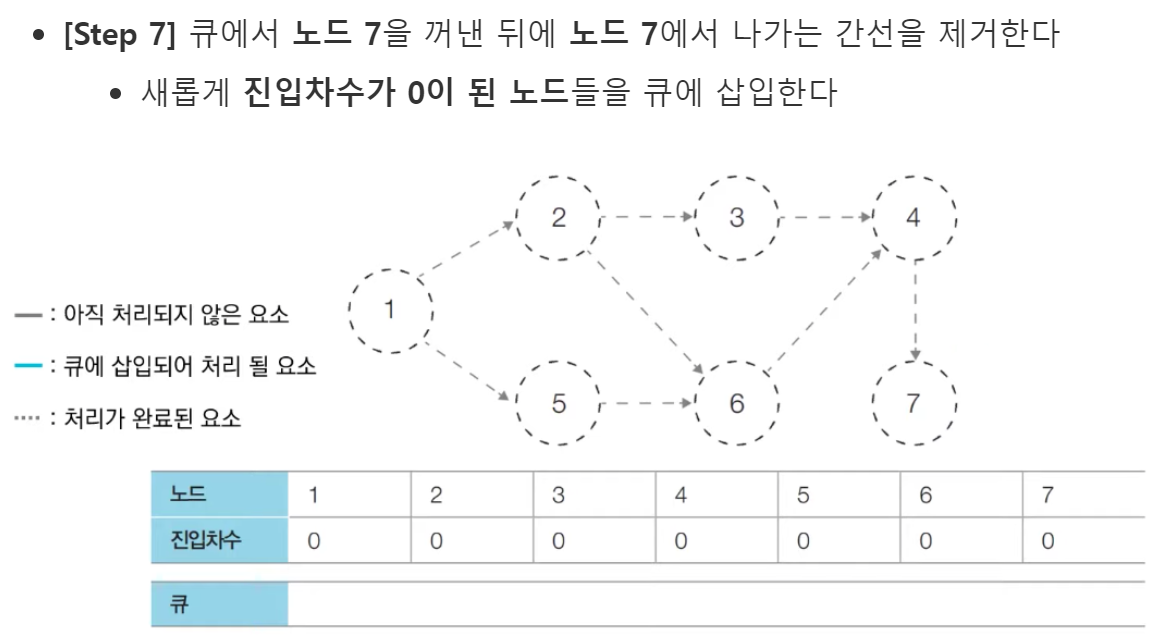

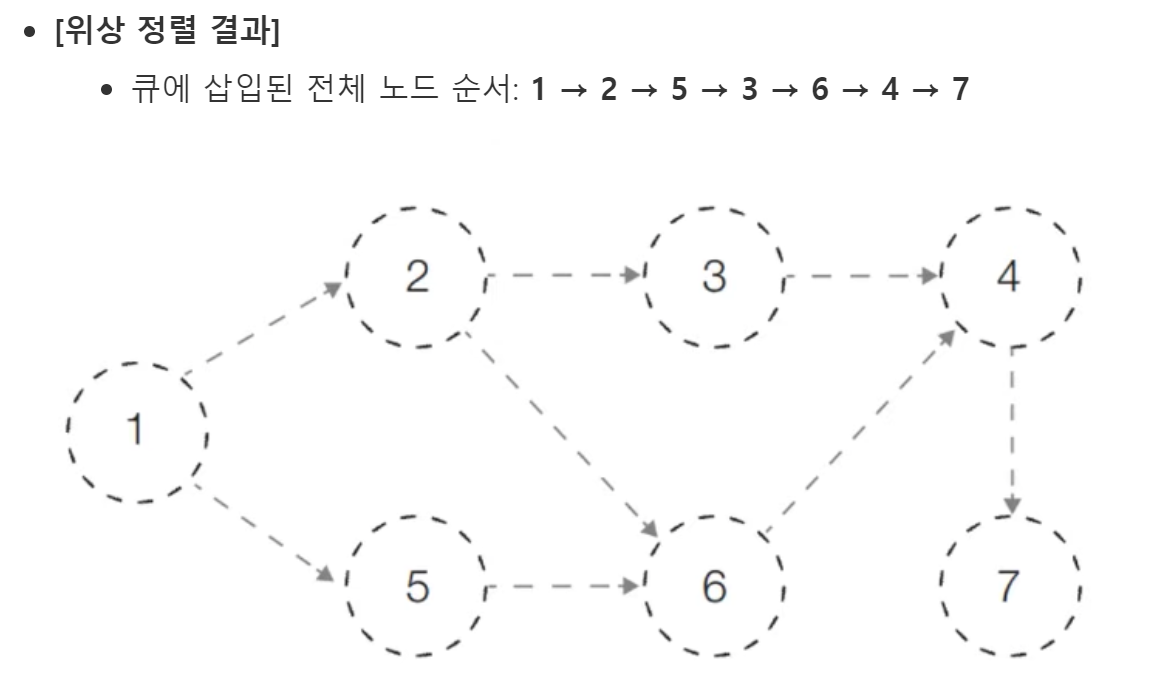

##### 위상 정렬의 특징
- 위상 정렬은 DAG에 대해서만 수행할 수 있다
    - DAG (Direct Acyclic Graph): 순환하지 않는 방향 그래프
- 위상 정렬에서는 여러 가지 답이 존재할 수 있다
    - 한 단계에서 큐에 새롭게 들어가는 원소가 2개 이상인 경우가 있다면 여러 가지 답이 존재한다
- 모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재한다고 판단할 수 있다
    - 사이클에 포함된 원소 중에서 어떠한 원소도 큐에 들어가지 못한다
- 스택을 활용한 DFS를 이용해 위상 정렬을 수행할 수도 있다

In [1]:
# 위 설명에 대한 코드

from collections import deque

# 노드의 개수와 간선의 개수를 입력받기
n, m = map(int, input().split())
indegree = [0] * (n+1) # 모든 노드에 대한 진입차수는 0으로 초기화
graph = [[] for i in range(n+1)] # 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트 초기화

# 방향 그래프의 모든 간선 정보를 입력받기
for _ in range(m):
  a, b = map(int, input().split())
  graph[a].append(b) # 정점 A에서 B로 이동 가능
  indegree[b] += 1 # 진입 차수를 1 증가
  
# 위상 정렬 함수
def topology_sort():
  result = [] # 알고리즘 수행 결과를 담을 리스트
  queue = deque() # 큐 기능을 위한 deque 라이브러리 사용
  
  # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
  for i in range(1, 1+1):
      if indegree[i] == 0:
          queue.append(i)
          
  # 큐가 빌 때까지 반복
  while queue:
    now = queue.popleft() # 큐에서 원소 꺼내기
    result.append(now)
    
    # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
    for i in graph[now]:
      indegree[i] -= 1
      
      # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
      if indegree[i] == 0:
        queue.append(i)

  # 위상 정렬 수행 결과 출력
  for i in result:
    print(i, end=' ')
    
topology_sort()          

1 2 5 3 6 4 7 

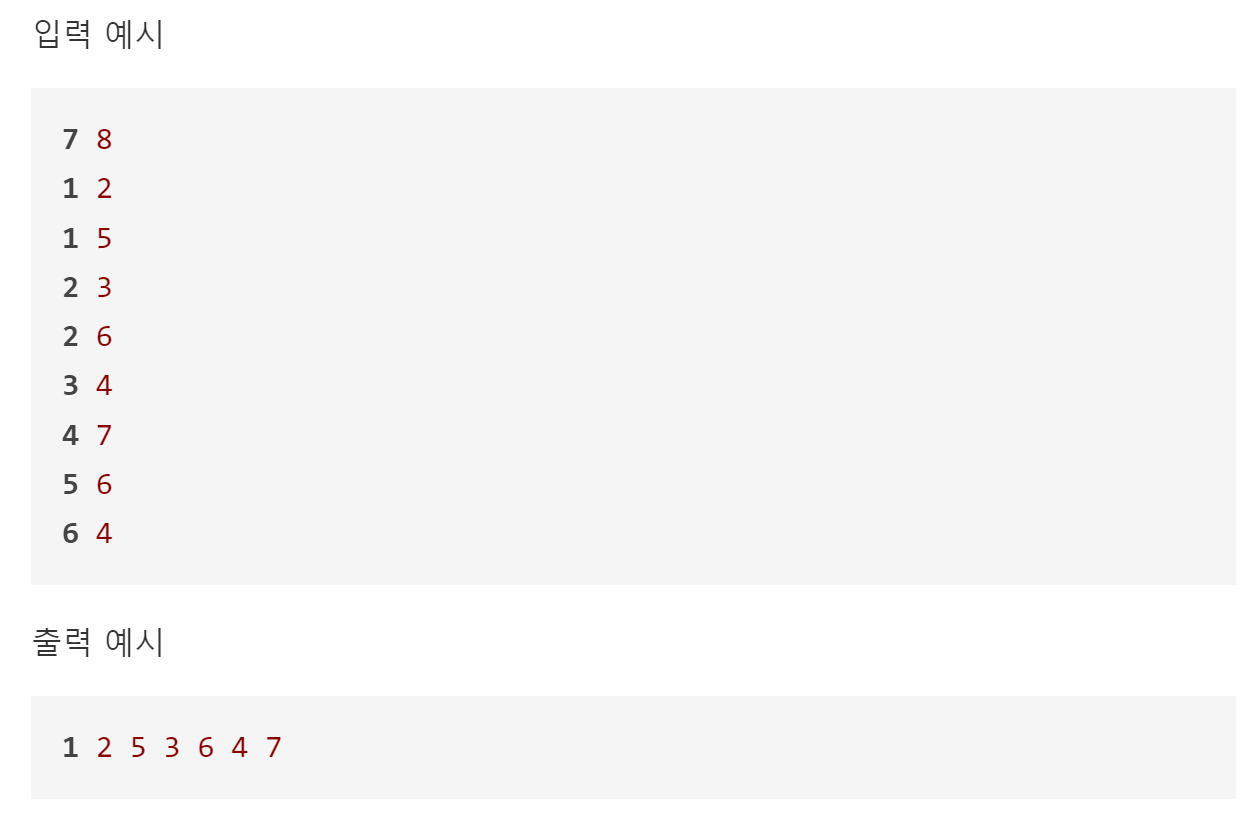

#### [문제] 게임 개발하기

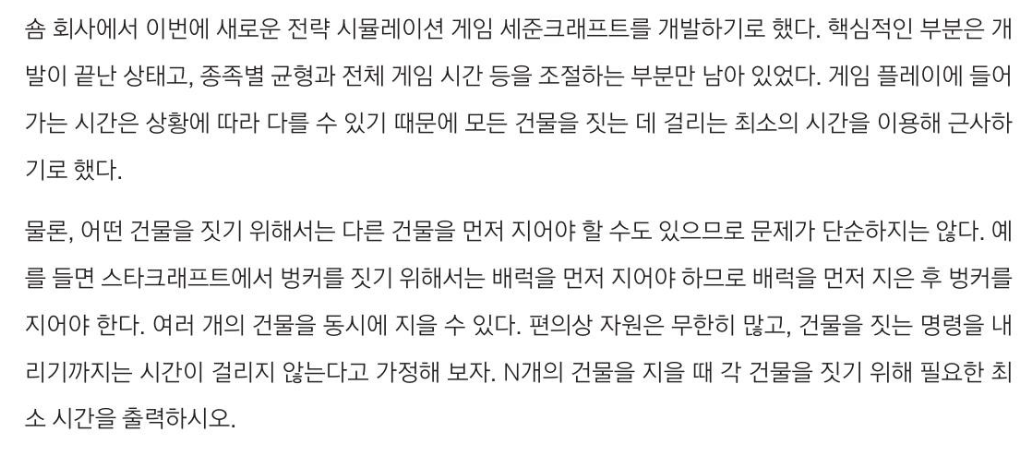

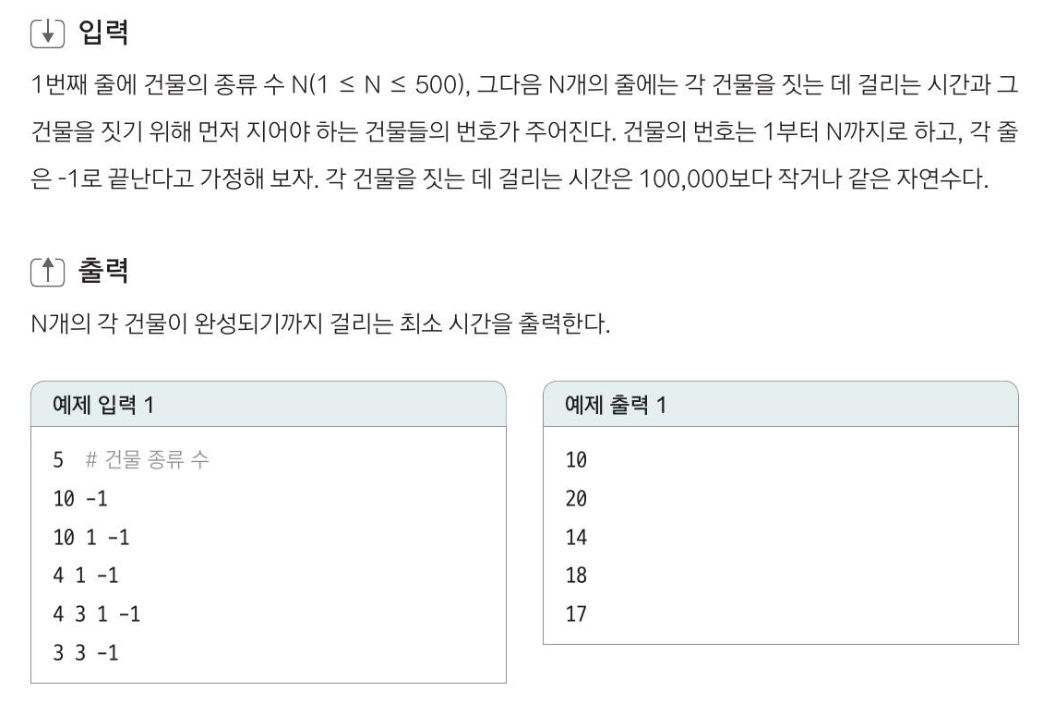

1. 입력 데이터를 바탕으로 필요한 자료구조를 초기화합니다. 
- 인접 리스트로 그래프를 표현해 주고 건물의 생산 시간을 따로 저장합니다. 
- 진입 차수 리스트는 [0, 1, 1, 2, 1], 정답 리스트는 모두 0으로 초기화합니다.

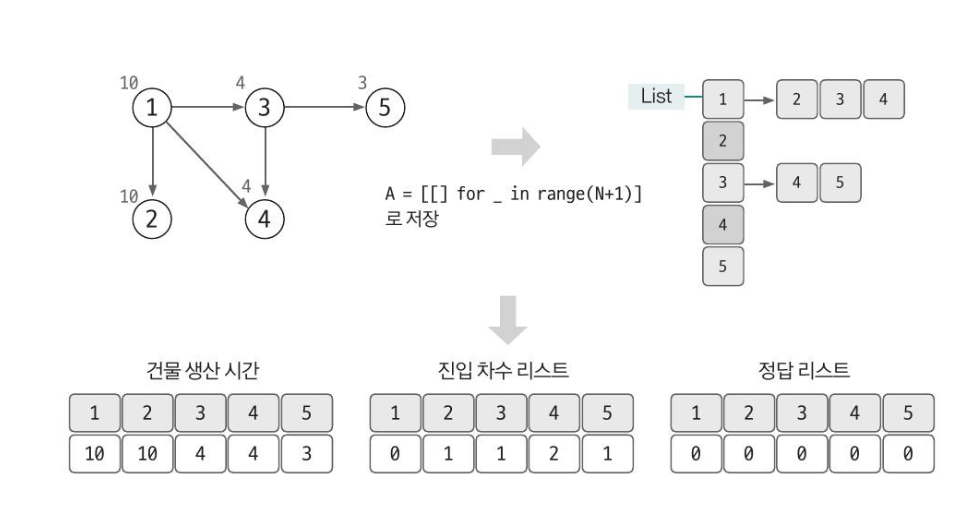

2. 위상 정렬을 실행하면서 각 건물을 짓는 데 걸리는 최대 시간을 업데이트합니다. 
- 업데이트은 다음과 같은 방법으로 수행합니다.

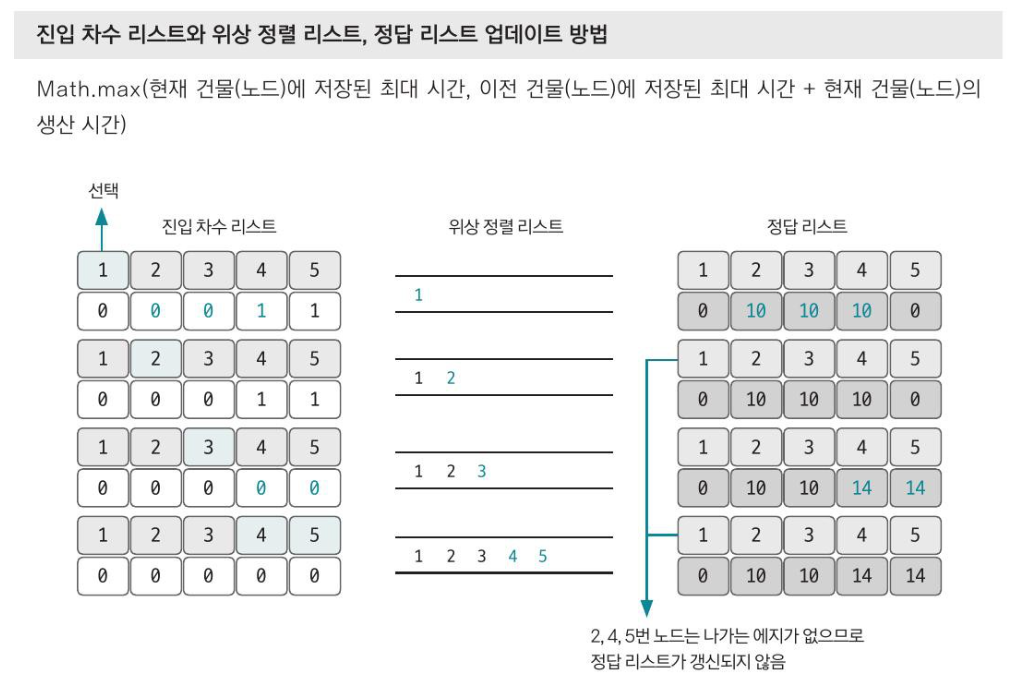

3. 정답 리스트에 자기 건물을 짓는 데 걸리는 시간을 더한 후 정답 리스트를 차례대로 출력합니다.

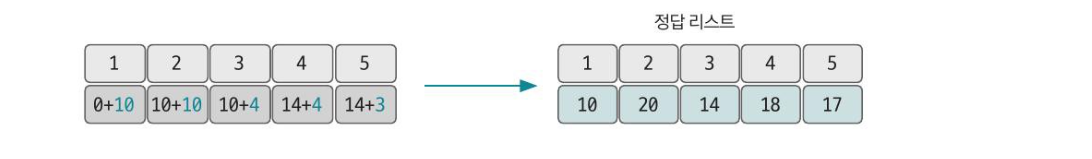

In [2]:
# 코드 입력
from collections import deque

# 건물 개수 입력
n = int(input())
data = [[] for _ in range(n+1)] # 건물 건설 순서 정보 리스트 초기화
indegree = [0] * (n+1) # 진입차수 리스트 초기화
self_time = [0] * (n+1) # 각 건물 건설 시간 리스트 초기화

for i in range(1, n+1):
    input_data = list(map(int, input().split())) # 건물 건설 시간, 건설 순서 정보 입력
    self_time[i] = input_data[0] # 각 건물 건설 시간 입력
    
    index = 1  # 건물 건설 순서 정보 입력 인덱스 초기화
    while True:
        prnTemp = input_data[index] # 건물 건설 순서 정보 입력
        index += 1 # 건물 건설 순서 정보 입력 인덱스 증가
        if prnTemp == -1:  # 건물 건설 순서 정보 입력이 끝나면
            break 
        data[prnTemp].append(i) # 진입차수 데이터 저장 
        indegree[i] += 1 # 진입차수 1 증가
        
queue = deque() # 큐 초기화
for i in range(1, n+1):
    if indegree[i] == 0: # 진입차수가 0인 건물 큐에 삽입
        queue.append(i)
        
# 정답 리스트 초기화
result = [0] * (n+1)

# 위상 정렬 알고리즘
while queue: # 큐가 빌 때까지 반복
    now = queue.popleft() # 큐에서 건물 번호 추출
    for next in data[now]:
        indegree[next] -= 1 # 진입차수 1 감소
        
        # 선행 건물의 건설시간에 현재 건물 건설시간을 더해 큰 값으로 갱신
        result[next] = max(result[next], result[now] + self_time[now])
        if indegree[next] == 0:
            queue.append(next)
            
# 결과 출력
for i in range(1, n+1):
    print(result[i]+self_time[i])

10
20
14
18
17


##### [문제] 사이클 게임

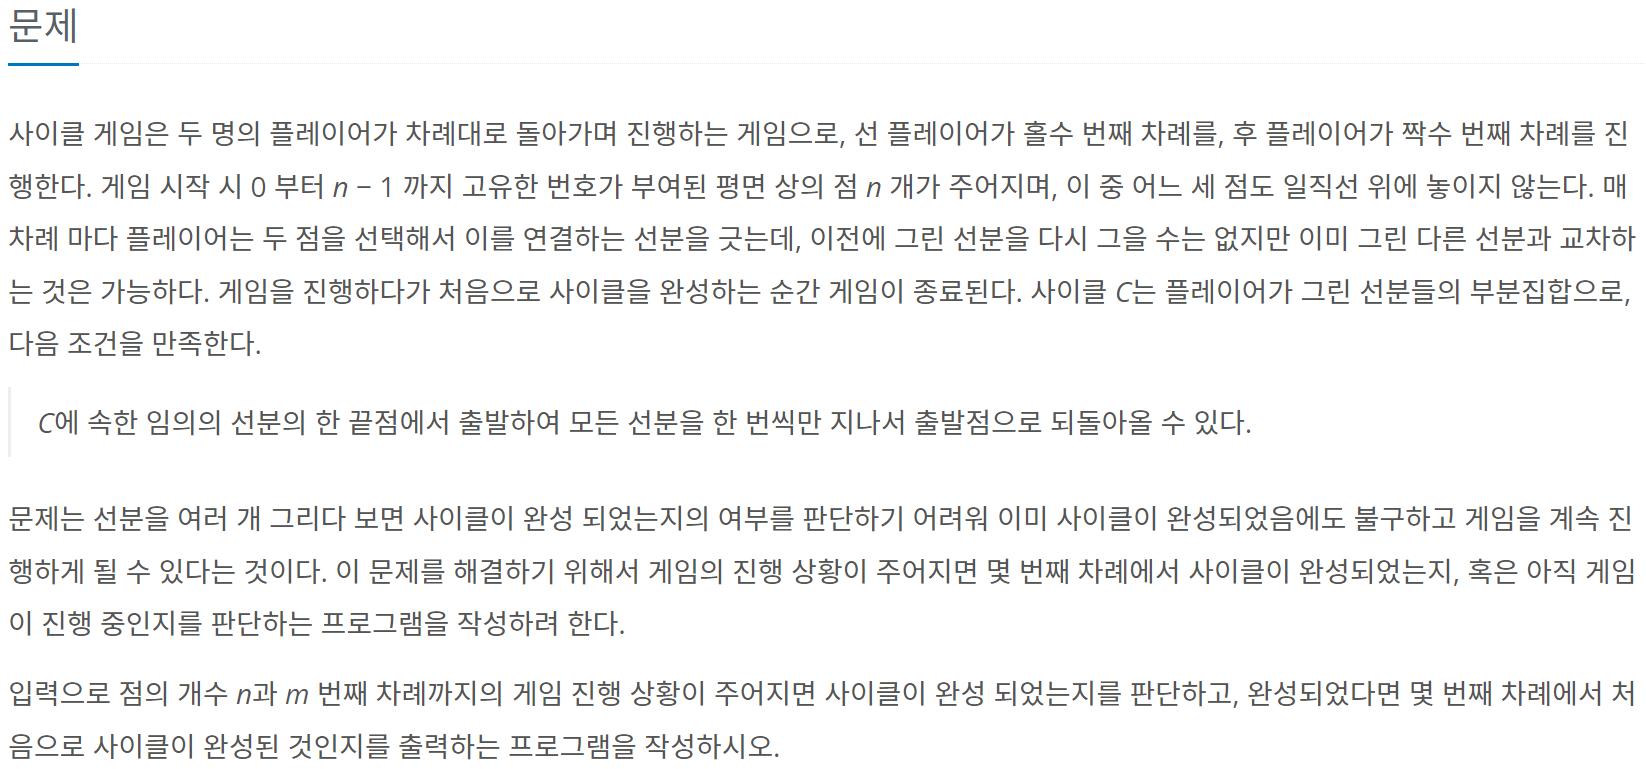

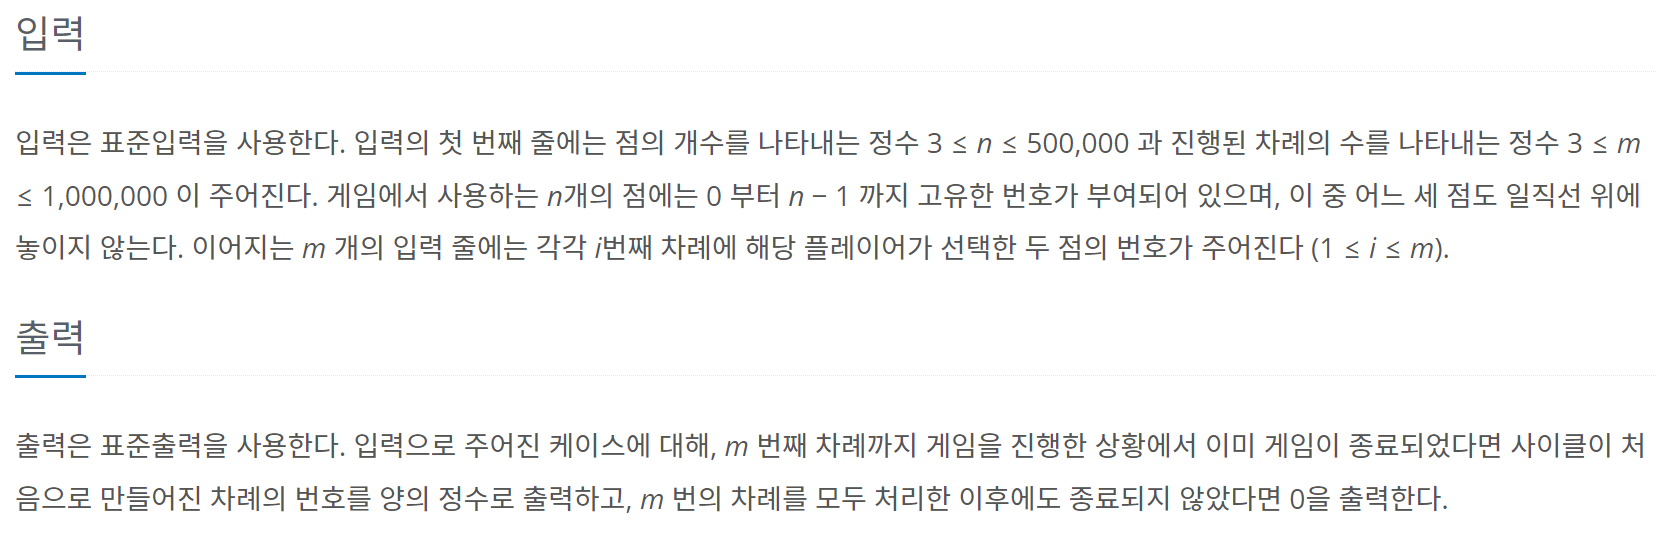

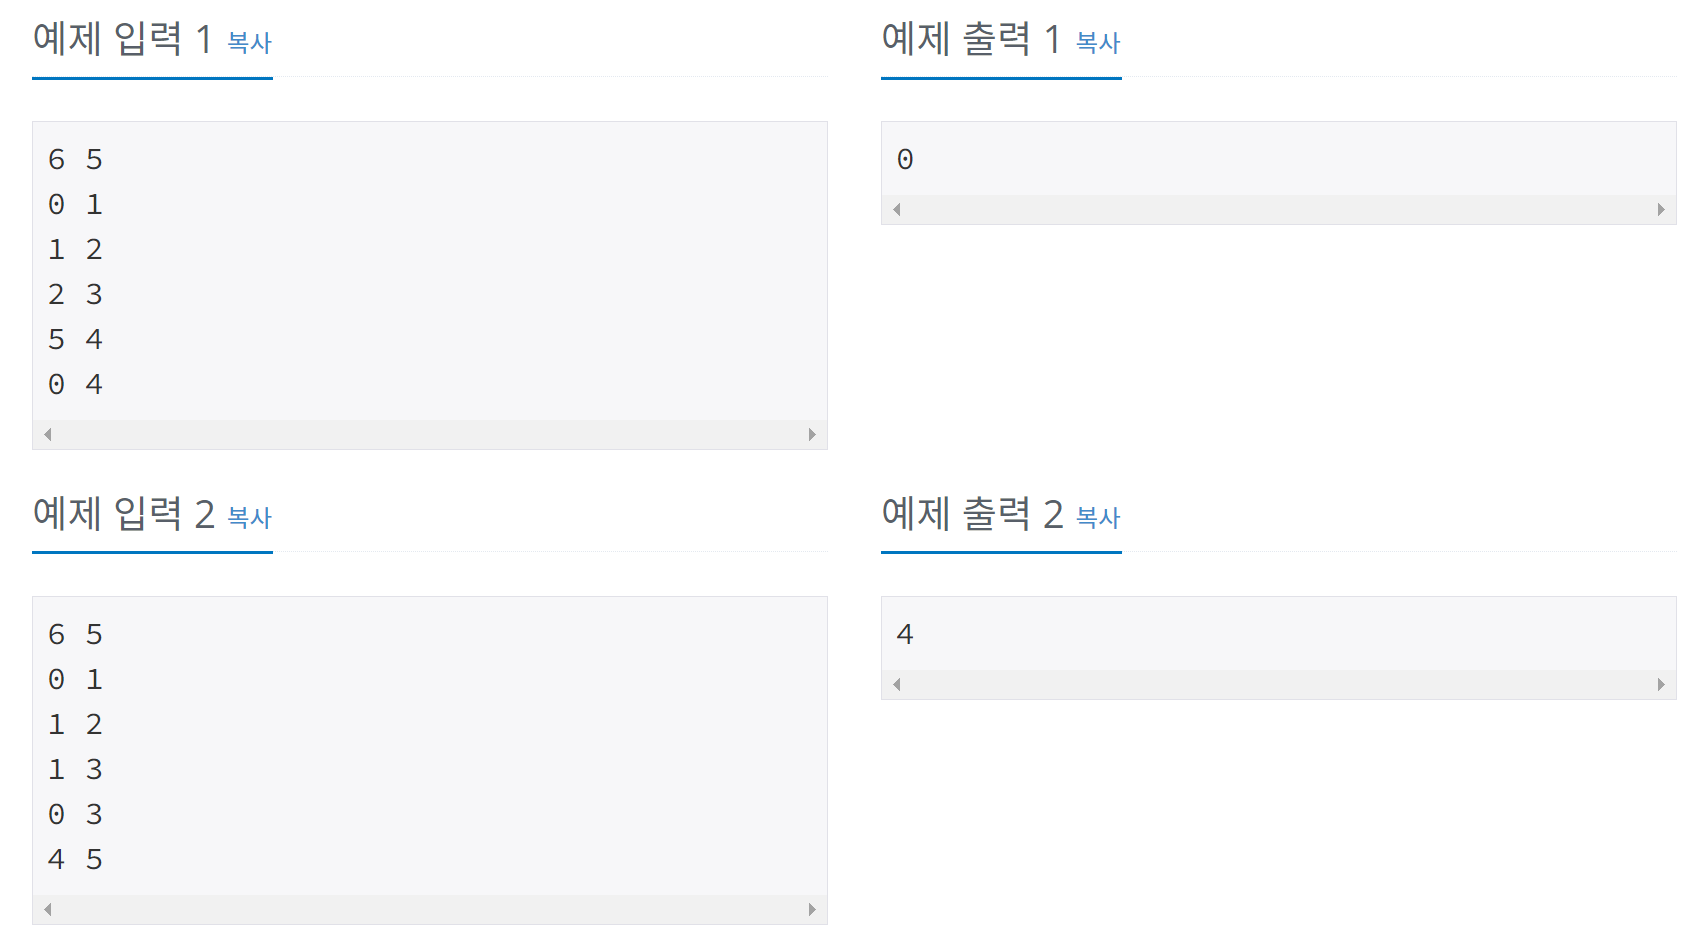

In [11]:
# 특정 원소가 속한 집합을 찾기


4
